In [ ]:
! pip install transformers
! pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 29.8 MB/s 
     |████████████████████████████████| 6.6 MB 53.0 MB/s 
     |████████████████████████████████| 596 kB 71.0 MB/s 
     |████████████████████████████████| 101 kB 14.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 362 kB 31.7 MB/s 
     |████████████████████████████████| 212 kB 69.4 MB/s 
     |████████████████████████████████| 140 kB 64.7 MB/s 
     |████████████████████████████████| 1.1 MB 39.4 MB/s 
     |████████████████████████████████| 127 kB 70.3 MB/s 
     |████████████████████████████████| 144 kB 73.1 MB/s 
     |████████████████████████████████| 271 kB 74.0 MB/s 
     |█████████

In [ ]:
import tensorflow as tf
import transformers
from transformers import DistilBertTokenizer, TFBertModel, TFDistilBertForMultipleChoice
from transformers import TFDistilBertForSequenceClassification
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TFGPT2ForSequenceClassification, TFRobertaForSequenceClassification

import json

MODEL_NAME = 'distilbert-base-uncased'
MODEL_NAME = 'huggingface/CodeBERTa-small-v1'
BATCH_SIZE = 16
N_EPOCHS = 3


In [ ]:
task2_x = []
task2_y = []
task2_test_x = []
task2_test_y = []

with open("train_x.txt", 'r') as f:
  for line in f:
    task2_x.append(line)


with open("train_y.txt", 'r') as f:
  for line in f:
    task2_y.append(line)


with open("test_x.txt", 'r') as f:
  for line in f:
    task2_test_x.append(line)


with open("test_y.txt", 'r') as f:
  for line in f:
    task2_test_y.append(line)


print(len(task2_x), len(task2_y),len(task2_test_x),len(task2_test_y))

17981 17981 1998 1998


In [ ]:
#tokenizer2 = DistilBertTokenizer.from_pretrained(MODEL_NAME)
tokenizer2 = AutoTokenizer.from_pretrained(MODEL_NAME)
# if tokenizer2.pad_token is None:
#     tokenizer2.add_special_tokens({'pad_token': '[PAD]'})


#tokenize the text
train_encodings2 = tokenizer2(list(task2_x),
                            truncation=True, 
                            padding=True)
test_encodings2 = tokenizer2(list(task2_test_x),
                           truncation=True, 
                           padding=True)



task2_y_str = []
task2_test_y_str = []

for a in task2_y:
  task2_y_str.append(int(a))

for a in task2_test_y:
  task2_test_y_str.append(int(a))


train_dataset2 = tf.data.Dataset.from_tensor_slices((dict(train_encodings2),
                                    list(task2_y_str)))
test_dataset2 = tf.data.Dataset.from_tensor_slices((dict(test_encodings2),
                                    list(task2_test_y_str)))


#model2 = TFDistilBertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3)
model2 = TFRobertaForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3,from_pt=True)



# model2 = TFGPT2ForSequenceClassification.from_pretrained("gpt2", num_labels=3)

#chose the optimizer
optimizerr2 = tf.keras.optimizers.Adam(learning_rate=5e-5)
#define the loss function 
losss2 = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#build the model



model2.compile(optimizer=optimizerr2,
              loss=losss2,
              metrics=['accuracy'])


# train the model 
history = model2.fit(train_dataset2.shuffle(len(task2_x)).batch(BATCH_SIZE),epochs=15, batch_size=BATCH_SIZE)



All PyTorch model weights were used when initializing TFRobertaForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/15
114/114 [==============================] - 120s 984ms/step - loss: 0.7666 - accuracy: 0.6883
Epoch 2/15
114/114 [==============================] - 112s 984ms/step - loss: 0.6642 - accuracy: 0.7379
Epoch 3/15
114/114 [==============================] - 112s 982ms/step - loss: 0.6302 - accuracy: 0.7439
Epoch 4/15
114/114 [==============================] - 112s 983ms/step - loss: 0.5923 - accuracy: 0.7506
Epoch 5/15
114/114 [==============================] - 112s 983ms/step - loss: 0.5350 - accuracy: 0.7671
Epoch 6/15
114/114 [==============================] - 112s 985ms/step - loss: 0.4766 - accuracy: 0.7985
Epoch 7/15
114/114 [==============================] - 112s 983ms/step - loss: 0.3897 - accuracy: 0.8304
Epoch 8/15
114/114 [==============================] - 112s 983ms/step - loss: 0.2844 - accuracy: 0.8833
Epoch 9/15
114/114 [==============================] - 112s 984ms/step - loss: 0.2280 - accuracy: 0.9091
Epoch 10/15
114/114 [==============================] - 112s 984m

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

predictions1_tran = []
predictions2_tran = []

test = model2.predict(test_dataset2.batch(1)).logits
for a in test:
  # print(a)
  # print(tf.nn.softmax(a, axis=0))
  # print(tf.nn.softmax(a, axis=0).numpy())
  # print(np.argmax(tf.nn.softmax(a, axis=0).numpy()))
  # print(a)

  predictions2_tran.append(int(np.argmax(tf.nn.softmax(a, axis=0).numpy())))

In [ ]:
print(classification_report(task2_test_y_str, predictions2_tran))

              precision    recall  f1-score   support

           0       0.60      0.41      0.48        37
           1       0.85      0.67      0.75       139
           2       0.24      0.62      0.34        26

    accuracy                           0.61       202
   macro avg       0.56      0.56      0.52       202
weighted avg       0.72      0.61      0.65       202



In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(task2_test_y_str, predictions2_tran))

0.6138613861386139


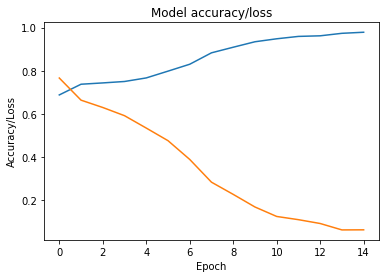

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model accuracy/loss')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epoch')
#plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# # Plot training & validation loss values
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

In [ ]:
print(test_dataset2)

In [ ]:
# 5 epochs

In [ ]:
#tokenizer2 = DistilBertTokenizer.from_pretrained(MODEL_NAME)
tokenizer2 = AutoTokenizer.from_pretrained(MODEL_NAME)
# if tokenizer2.pad_token is None:
#     tokenizer2.add_special_tokens({'pad_token': '[PAD]'})


#tokenize the text
train_encodings2 = tokenizer2(list(task2_x),
                            truncation=True, 
                            padding=True)
test_encodings2 = tokenizer2(list(task2_test_x),
                           truncation=True, 
                           padding=True)



task2_y_str = []
task2_test_y_str = []

for a in task2_y:
  task2_y_str.append(int(a))

for a in task2_test_y:
  task2_test_y_str.append(int(a))


train_dataset2 = tf.data.Dataset.from_tensor_slices((dict(train_encodings2),
                                    list(task2_y_str)))
test_dataset2 = tf.data.Dataset.from_tensor_slices((dict(test_encodings2),
                                    list(task2_test_y_str)))


#model2 = TFDistilBertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3)
model2 = TFRobertaForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3,from_pt=True)



# model2 = TFGPT2ForSequenceClassification.from_pretrained("gpt2", num_labels=3)

#chose the optimizer
optimizerr2 = tf.keras.optimizers.Adam(learning_rate=5e-5)
#define the loss function 
losss2 = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#build the model



model2.compile(optimizer=optimizerr2,
              loss=losss2,
              metrics=['accuracy'])


# train the model 
history = model2.fit(train_dataset2.shuffle(len(task2_x)).batch(BATCH_SIZE),epochs=5, batch_size=BATCH_SIZE)


All PyTorch model weights were used when initializing TFRobertaForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5
114/114 [==============================] - 117s 961ms/step - loss: 0.7389 - accuracy: 0.7131
Epoch 2/5
114/114 [==============================] - 112s 981ms/step - loss: 0.6390 - accuracy: 0.7379
Epoch 3/5
114/114 [==============================] - 112s 982ms/step - loss: 0.6064 - accuracy: 0.7384
Epoch 4/5
114/114 [==============================] - 112s 983ms/step - loss: 0.5692 - accuracy: 0.7621
Epoch 5/5
114/114 [==============================] - 112s 984ms/step - loss: 0.4630 - accuracy: 0.8023


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

predictions1_tran = []
predictions2_tran = []

test = model2.predict(test_dataset2.batch(1)).logits
for a in test:
  # print(a)
  # print(tf.nn.softmax(a, axis=0))
  # print(tf.nn.softmax(a, axis=0).numpy())
  # print(np.argmax(tf.nn.softmax(a, axis=0).numpy()))
  # print(a)

  predictions2_tran.append(int(np.argmax(tf.nn.softmax(a, axis=0).numpy())))

In [ ]:
print(classification_report(task2_test_y_str, predictions2_tran))

              precision    recall  f1-score   support

           0       0.67      0.43      0.52        37
           1       0.78      0.88      0.83       139
           2       0.33      0.27      0.30        26

    accuracy                           0.72       202
   macro avg       0.59      0.53      0.55       202
weighted avg       0.70      0.72      0.71       202



In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(task2_test_y_str, predictions2_tran))

0.7227722772277227


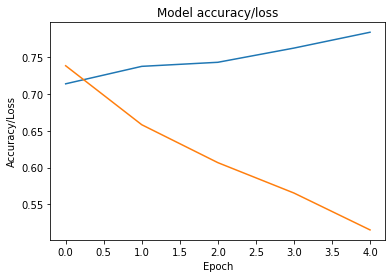

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model accuracy/loss')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epoch')
#plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# # Plot training & validation loss values
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

In [ ]:
# 10 epochs

In [ ]:
#tokenizer2 = DistilBertTokenizer.from_pretrained(MODEL_NAME)
tokenizer2 = AutoTokenizer.from_pretrained(MODEL_NAME)
# if tokenizer2.pad_token is None:
#     tokenizer2.add_special_tokens({'pad_token': '[PAD]'})


#tokenize the text
train_encodings2 = tokenizer2(list(task2_x),
                            truncation=True, 
                            padding=True)
test_encodings2 = tokenizer2(list(task2_test_x),
                           truncation=True, 
                           padding=True)



task2_y_str = []
task2_test_y_str = []

for a in task2_y:
  task2_y_str.append(int(a))

for a in task2_test_y:
  task2_test_y_str.append(int(a))


train_dataset2 = tf.data.Dataset.from_tensor_slices((dict(train_encodings2),
                                    list(task2_y_str)))
test_dataset2 = tf.data.Dataset.from_tensor_slices((dict(test_encodings2),
                                    list(task2_test_y_str)))


#model2 = TFDistilBertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3)
model2 = TFRobertaForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3,from_pt=True)



# model2 = TFGPT2ForSequenceClassification.from_pretrained("gpt2", num_labels=3)

#chose the optimizer
optimizerr2 = tf.keras.optimizers.Adam(learning_rate=5e-5)
#define the loss function 
losss2 = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#build the model



model2.compile(optimizer=optimizerr2,
              loss=losss2,
              metrics=['accuracy'])


# train the model 
history = model2.fit(train_dataset2.shuffle(len(task2_x)).batch(BATCH_SIZE),epochs=10, batch_size=BATCH_SIZE)


All PyTorch model weights were used when initializing TFRobertaForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/10
114/114 [==============================] - 119s 984ms/step - loss: 0.7404 - accuracy: 0.7203
Epoch 2/10
114/114 [==============================] - 112s 983ms/step - loss: 0.6593 - accuracy: 0.7285
Epoch 3/10
114/114 [==============================] - 112s 984ms/step - loss: 0.5982 - accuracy: 0.7439
Epoch 4/10
114/114 [==============================] - 112s 983ms/step - loss: 0.5625 - accuracy: 0.7594
Epoch 5/10
114/114 [==============================] - 112s 983ms/step - loss: 0.4715 - accuracy: 0.7930
Epoch 6/10
114/114 [==============================] - 112s 982ms/step - loss: 0.4234 - accuracy: 0.8227
Epoch 7/10
114/114 [==============================] - 112s 983ms/step - loss: 0.3590 - accuracy: 0.8519
Epoch 8/10
114/114 [==============================] - 112s 984ms/step - loss: 0.2744 - accuracy: 0.8871
Epoch 9/10
114/114 [==============================] - 112s 983ms/step - loss: 0.2162 - accuracy: 0.9157
Epoch 10/10
114/114 [==============================] - 112s 981m

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

predictions1_tran = []
predictions2_tran = []

test = model2.predict(test_dataset2.batch(1)).logits
for a in test:
  # print(a)
  # print(tf.nn.softmax(a, axis=0))
  # print(tf.nn.softmax(a, axis=0).numpy())
  # print(np.argmax(tf.nn.softmax(a, axis=0).numpy()))
  # print(a)

  predictions2_tran.append(int(np.argmax(tf.nn.softmax(a, axis=0).numpy())))

In [ ]:
print(classification_report(task2_test_y_str, predictions2_tran))

              precision    recall  f1-score   support

           0       0.71      0.41      0.52        37
           1       0.84      0.73      0.78       139
           2       0.29      0.65      0.40        26

    accuracy                           0.66       202
   macro avg       0.61      0.60      0.57       202
weighted avg       0.74      0.66      0.68       202



In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(task2_test_y_str, predictions2_tran))

0.6633663366336634


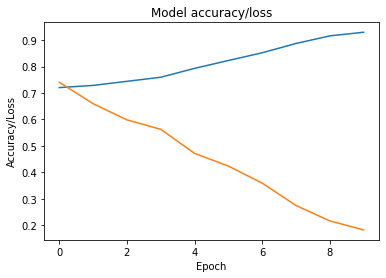

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model accuracy/loss')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epoch')
#plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# # Plot training & validation loss values
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

In [ ]:
# 20 epochs

In [ ]:
#tokenizer2 = DistilBertTokenizer.from_pretrained(MODEL_NAME)
tokenizer2 = AutoTokenizer.from_pretrained(MODEL_NAME)
# if tokenizer2.pad_token is None:
#     tokenizer2.add_special_tokens({'pad_token': '[PAD]'})


#tokenize the text
train_encodings2 = tokenizer2(list(task2_x),
                            truncation=True, 
                            padding=True)
test_encodings2 = tokenizer2(list(task2_test_x),
                           truncation=True, 
                           padding=True)



task2_y_str = []
task2_test_y_str = []

for a in task2_y:
  task2_y_str.append(int(a))

for a in task2_test_y:
  task2_test_y_str.append(int(a))


train_dataset2 = tf.data.Dataset.from_tensor_slices((dict(train_encodings2),
                                    list(task2_y_str)))
test_dataset2 = tf.data.Dataset.from_tensor_slices((dict(test_encodings2),
                                    list(task2_test_y_str)))


#model2 = TFDistilBertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3)
model2 = TFRobertaForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3,from_pt=True)



# model2 = TFGPT2ForSequenceClassification.from_pretrained("gpt2", num_labels=3)

#chose the optimizer
optimizerr2 = tf.keras.optimizers.Adam(learning_rate=5e-5)
#define the loss function 
losss2 = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#build the model



model2.compile(optimizer=optimizerr2,
              loss=losss2,
              metrics=['accuracy'])


# train the model 
history = model2.fit(train_dataset2.shuffle(len(task2_x)).batch(BATCH_SIZE),epochs=20, batch_size=BATCH_SIZE)


All PyTorch model weights were used when initializing TFRobertaForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/20
114/114 [==============================] - 120s 987ms/step - loss: 0.7520 - accuracy: 0.7109
Epoch 2/20
114/114 [==============================] - 112s 984ms/step - loss: 0.6834 - accuracy: 0.7291
Epoch 3/20
114/114 [==============================] - 113s 988ms/step - loss: 0.6347 - accuracy: 0.7412
Epoch 4/20
114/114 [==============================] - 112s 985ms/step - loss: 0.6066 - accuracy: 0.7445
Epoch 5/20
114/114 [==============================] - 112s 985ms/step - loss: 0.5185 - accuracy: 0.7924
Epoch 6/20
114/114 [==============================] - 113s 988ms/step - loss: 0.4518 - accuracy: 0.8106
Epoch 7/20
114/114 [==============================] - 112s 985ms/step - loss: 0.3937 - accuracy: 0.8199
Epoch 8/20
114/114 [==============================] - 112s 984ms/step - loss: 0.2890 - accuracy: 0.8827
Epoch 9/20
114/114 [==============================] - 112s 984ms/step - loss: 0.2277 - accuracy: 0.9108
Epoch 10/20
114/114 [==============================] - 113s 988m

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

predictions1_tran = []
predictions2_tran = []

test = model2.predict(test_dataset2.batch(1)).logits
for a in test:
  # print(a)
  # print(tf.nn.softmax(a, axis=0))
  # print(tf.nn.softmax(a, axis=0).numpy())
  # print(np.argmax(tf.nn.softmax(a, axis=0).numpy()))
  # print(a)

  predictions2_tran.append(int(np.argmax(tf.nn.softmax(a, axis=0).numpy())))

In [ ]:
print(classification_report(task2_test_y_str, predictions2_tran))

              precision    recall  f1-score   support

           0       0.54      0.57      0.56        35
           1       0.80      0.83      0.81       134
           2       0.42      0.33      0.37        33

    accuracy                           0.70       202
   macro avg       0.59      0.58      0.58       202
weighted avg       0.69      0.70      0.70       202



In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(task2_test_y_str, predictions2_tran))

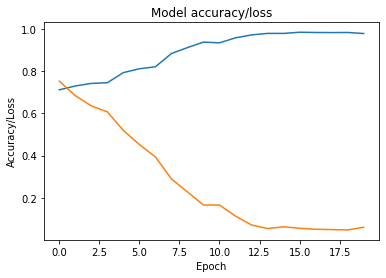

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model accuracy/loss')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epoch')
#plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# # Plot training & validation loss values
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

In [ ]:
# 25 epochs

In [ ]:
#tokenizer2 = DistilBertTokenizer.from_pretrained(MODEL_NAME)
tokenizer2 = AutoTokenizer.from_pretrained(MODEL_NAME)
# if tokenizer2.pad_token is None:
#     tokenizer2.add_special_tokens({'pad_token': '[PAD]'})


#tokenize the text
train_encodings2 = tokenizer2(list(task2_x),
                            truncation=True, 
                            padding=True)
test_encodings2 = tokenizer2(list(task2_test_x),
                           truncation=True, 
                           padding=True)



task2_y_str = []
task2_test_y_str = []

for a in task2_y:
  task2_y_str.append(int(a))

for a in task2_test_y:
  task2_test_y_str.append(int(a))


train_dataset2 = tf.data.Dataset.from_tensor_slices((dict(train_encodings2),
                                    list(task2_y_str)))
test_dataset2 = tf.data.Dataset.from_tensor_slices((dict(test_encodings2),
                                    list(task2_test_y_str)))


#model2 = TFDistilBertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3)
model2 = TFRobertaForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3,from_pt=True)



# model2 = TFGPT2ForSequenceClassification.from_pretrained("gpt2", num_labels=3)

#chose the optimizer
optimizerr2 = tf.keras.optimizers.Adam(learning_rate=5e-5)
#define the loss function 
losss2 = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#build the model



model2.compile(optimizer=optimizerr2,
              loss=losss2,
              metrics=['accuracy'])


# train the model 
history = model2.fit(train_dataset2.shuffle(len(task2_x)).batch(BATCH_SIZE),epochs=25, batch_size=BATCH_SIZE)


All PyTorch model weights were used when initializing TFRobertaForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/25
114/114 [==============================] - 120s 992ms/step - loss: 0.7155 - accuracy: 0.7285
Epoch 2/25
114/114 [==============================] - 112s 984ms/step - loss: 0.6665 - accuracy: 0.7291
Epoch 3/25
114/114 [==============================] - 112s 983ms/step - loss: 0.6343 - accuracy: 0.7483
Epoch 4/25
114/114 [==============================] - 113s 989ms/step - loss: 0.5877 - accuracy: 0.7588
Epoch 5/25
114/114 [==============================] - 112s 986ms/step - loss: 0.5178 - accuracy: 0.7792
Epoch 6/25
114/114 [==============================] - 113s 989ms/step - loss: 0.4544 - accuracy: 0.8056
Epoch 7/25
114/114 [==============================] - 113s 991ms/step - loss: 0.3663 - accuracy: 0.8557
Epoch 8/25
114/114 [==============================] - 113s 990ms/step - loss: 0.3195 - accuracy: 0.8678
Epoch 9/25
114/114 [==============================] - 113s 990ms/step - loss: 0.2278 - accuracy: 0.9069
Epoch 10/25
114/114 [==============================] - 113s 989m

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

predictions1_tran = []
predictions2_tran = []

test = model2.predict(test_dataset2.batch(1)).logits
for a in test:
  # print(a)
  # print(tf.nn.softmax(a, axis=0))
  # print(tf.nn.softmax(a, axis=0).numpy())
  # print(np.argmax(tf.nn.softmax(a, axis=0).numpy()))
  # print(a)

  predictions2_tran.append(int(np.argmax(tf.nn.softmax(a, axis=0).numpy())))

In [ ]:
print(classification_report(task2_test_y_str, predictions2_tran))

              precision    recall  f1-score   support

           0       0.41      0.60      0.48        25
           1       0.80      0.87      0.83       128
           2       0.62      0.33      0.43        49

    accuracy                           0.70       202
   macro avg       0.61      0.60      0.58       202
weighted avg       0.71      0.70      0.69       202



In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(task2_test_y_str, predictions2_tran))

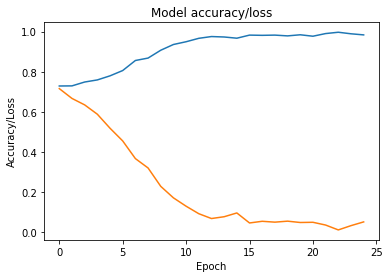

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model accuracy/loss')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epoch')
#plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# # Plot training & validation loss values
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

In [ ]:
#tokenizer2 = DistilBertTokenizer.from_pretrained(MODEL_NAME)
tokenizer2 = AutoTokenizer.from_pretrained(MODEL_NAME)
# if tokenizer2.pad_token is None:
#     tokenizer2.add_special_tokens({'pad_token': '[PAD]'})


#tokenize the text
train_encodings2 = tokenizer2(list(task2_x),
                            truncation=True, 
                            padding=True)
test_encodings2 = tokenizer2(list(task2_test_x),
                           truncation=True, 
                           padding=True)

Downloading:   0%|          | 0.00/19.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/480 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/971k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/471k [00:00<?, ?B/s]

In [ ]:
for a in test_encodings2:
  print(a)

print(dir(test_encodings2))

# print(test_encodings2.keys())
# print(test_encodings2.data)
# print(test_encodings2.encodings)
print(tokenizer2.words)

input_ids
attention_mask
['_MutableMapping__marker', '__abstractmethods__', '__class__', '__contains__', '__copy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__setattr__', '__setitem__', '__setstate__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_encodings', '_n_sequences', 'char_to_token', 'char_to_word', 'clear', 'convert_to_tensors', 'copy', 'data', 'encodings', 'fromkeys', 'get', 'is_fast', 'items', 'keys', 'n_sequences', 'pop', 'popitem', 'sequence_ids', 'setdefault', 'to', 'token_to_chars', 'token_to_sequence', 'token_to_word', 'tokens', 'update', 'values', 'word_ids', 'word_to_chars', 'word_to_tokens', 'words']


AttributeError: ignored

In [ ]:
x = 'OPENQASM 2.0; include "qelib1.inc"; qreg q[4]; creg c[4]; rz(5.4381164) q[2]; cx q[1],q[3]; rz(4.6190622) q[0]; u1(4.9972155) q[1]; cx q[3],q[2]; t q[0]; cswap q[1],q[2],q[3]; y q[0]; crz(1.5402184) q[3],q[1]; id q[0]; s q[2]; rzz(1.246787) q[1],q[3]; cx q[0],q[2]; ccx q[2],q[3],q[0]; u2(3.1096542,5.093437) q[1]; rzz(6.0521642) q[1],q[2]; s q[0]; z q[3]; cy q[1],q[3]; rzz(0.84250149) q[2],q[0]; cu3(3.2511164,3.3024292,4.7717136) q[2],q[3]; s q[1]; ry(3.3015167) q[0]; rzz(3.8068632) q[3],q[2]; rx(4.7865738) q[0]; ry(2.9079308) q[1]; measure q[0] -> c[0]; measure q[1] -> c[1]; measure q[2] -> c[2]; measure q[3] -> c[3];'

print(tokenizer2(x))

print(tokenizer2.decode(tokenizer2(x)['input_ids']))


for tok in tokenizer2(x)['input_ids']:
  print(tokenizer2.decode(tok))


{'input_ids': [0, 9089, 53, 43478, 740, 18, 20, 31, 2804, 331, 85, 45228, 21, 18, 7174, 1282, 2013, 1114, 2013, 63, 24, 696, 296, 1114, 296, 63, 24, 696, 535, 94, 12, 25, 18, 24, 4607, 2166, 1116, 13, 2013, 63, 22, 696, 14030, 2013, 63, 21, 737, 85, 63, 23, 696, 535, 94, 12, 24, 18, 26, 3092, 4709, 3490, 13, 2013, 63, 20, 696, 1172, 21, 12, 24, 18, 46943, 4984, 2846, 13, 2013, 63, 21, 696, 14030, 2013, 63, 23, 737, 85, 63, 22, 696, 304, 2013, 63, 20, 696, 296, 11679, 2013, 63, 21, 737, 85, 63, 22, 737, 85, 63, 23, 696, 832, 2013, 63, 20, 696, 7634, 94, 12, 21, 18, 8348, 2603, 24715, 13, 2013, 63, 23, 737, 85, 63, 21, 696, 973, 2013, 63, 20, 696, 325, 2013, 63, 22, 696, 535, 6063, 12, 21, 18, 35374, 6071, 27, 13, 2013, 63, 21, 737, 85, 63, 23, 696, 14030, 2013, 63, 20, 737, 85, 63, 22, 696, 7675, 92, 2013, 63, 22, 737, 85, 63, 23, 737, 85, 63, 20, 696, 1172, 22, 12, 23, 18, 18828, 7331, 6999, 16, 25, 18, 3176, 4001, 5499, 13, 2013, 63, 21, 696, 535, 6063, 12, 26, 18, 5090, 4984, 1116, 2

In [ ]:
tokenizer2 = AutoTokenizer.from_pretrained(MODEL_NAME)

tokenizer = tokenizer2.train_new_from_iterator(task2_x, len(task2_x))


In [ ]:
tokenizer2 = tokenizer

In [ ]:
train_encodings2 = tokenizer2(list(task2_x),
                            truncation=True, 
                            padding=True)
test_encodings2 = tokenizer2(list(task2_test_x),
                           truncation=True, 
                           padding=True)



task2_y_str = []
task2_test_y_str = []

for a in task2_y:
  task2_y_str.append(int(a))

for a in task2_test_y:
  task2_test_y_str.append(int(a))


train_dataset2 = tf.data.Dataset.from_tensor_slices((dict(train_encodings2),
                                    list(task2_y_str)))
test_dataset2 = tf.data.Dataset.from_tensor_slices((dict(test_encodings2),
                                    list(task2_test_y_str)))


#model2 = TFDistilBertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3)
model2 = TFRobertaForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3,from_pt=True)



# model2 = TFGPT2ForSequenceClassification.from_pretrained("gpt2", num_labels=3)

#chose the optimizer
optimizerr2 = tf.keras.optimizers.Adam(learning_rate=5e-5)
#define the loss function 
losss2 = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#build the model



model2.compile(optimizer=optimizerr2,
              loss=losss2,
              metrics=['accuracy'])


# train the model 
history = model2.fit(train_dataset2.shuffle(len(task2_x)).batch(BATCH_SIZE),epochs=5, batch_size=BATCH_SIZE)

Downloading:   0%|          | 0.00/321M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFRobertaForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5
1124/1124 [==============================] - 1129s 994ms/step - loss: 0.6138 - accuracy: 0.7408
Epoch 2/5
1124/1124 [==============================] - 1119s 996ms/step - loss: 0.5501 - accuracy: 0.7644
Epoch 3/5
1124/1124 [==============================] - 1119s 995ms/step - loss: 0.4573 - accuracy: 0.8078
Epoch 4/5
1124/1124 [==============================] - 1118s 995ms/step - loss: 0.3006 - accuracy: 0.8699
Epoch 5/5
1124/1124 [==============================] - 1119s 996ms/step - loss: 0.2017 - accuracy: 0.9097


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

predictions1_tran = []
predictions2_tran = []

test = model2.predict(test_dataset2.batch(1)).logits
for a in test:
  # print(a)
  # print(tf.nn.softmax(a, axis=0))
  # print(tf.nn.softmax(a, axis=0).numpy())
  # print(np.argmax(tf.nn.softmax(a, axis=0).numpy()))
  # print(a)

  predictions2_tran.append(int(np.argmax(tf.nn.softmax(a, axis=0).numpy())))

In [ ]:
print(classification_report(task2_test_y_str, predictions2_tran))

              precision    recall  f1-score   support

           0       0.86      0.56      0.68       416
           1       0.79      0.82      0.81      1284
           2       0.28      0.36      0.32       298

    accuracy                           0.70      1998
   macro avg       0.64      0.58      0.60      1998
weighted avg       0.73      0.70      0.71      1998



In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(task2_test_y_str, predictions2_tran))

0.7007007007007007


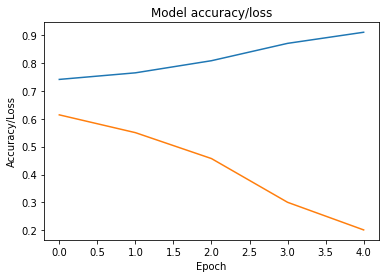

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model accuracy/loss')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epoch')
#plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# # Plot training & validation loss values
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()